<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install autogluon

     |████████████████████████████████| 273 kB 60.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 352 kB 54.0 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 210 kB 51.2 MB/s 
     |████████████████████████████████| 27.4 MB 1.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 802 kB 49.7 MB/s 
     |████████████████████████████████| 4.2 MB 59.6 MB/s 
     |████████████████████████████████| 131 kB 60.6 MB/s 
     |████████████████████████████████| 119 kB 62.2 MB/s 
     |████████████████████████████████| 1.3 MB 64.4 MB/s 
     |████████████████████████████████| 3.0 MB 41.5 MB/s 
     |████████████████████████████████| 296 kB 72.6 MB/s 
     |████████████████████████████████| 2.0 MB 60.0 MB/s 
     |████████████████████████████████| 67.3 MB 11 kB/s 
     |████████████████████████████████| 189 kB 40.3 MB/s 
     |█████████████

In [4]:
!pip install --upgrade mxnet

In [1]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [2]:
#metatrader5 file format
df=pd.read_csv('EURUSD_M1_202001020600_202201072354.csv')

In [3]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2020.01.02\t06:00:00\t1.12132\t1.12133\t1.1212...                        
1  2020.01.02\t06:01:00\t1.12131\t1.12133\t1.1213...                        
2  2020.01.02\t06:02:00\t1.12132\t1.12133\t1.1213...                        
3  2020.01.02\t06:03:00\t1.12132\t1.12134\t1.1213...                        
4  2020.01.02\t06:04:00\t1.12132\t1.12133\t1.1213...                        
       <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
753377  2022.01.07\t23:50:00\t1.13612\t1.13612\t1.1359...                        
753378  2022.01.07\t23:51:00\t1.13597\t1.13597\t1.1358...                        
753379  2022.01.07\t23:52:00\t1.13589\t1.13590\t1.1358...                        
753380  2022.01.07\t23:53:00\t1.13585\t1.13585\t1.1358...                        
753381  2022.01.07\t23:54:00\t1.13585\t1.13591\t1.1358...                        
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [4]:
df.columns=['header']


In [5]:
df = df.header.str.split('\t', expand=True)


In [6]:
df

,0,1,2,3,4,5,6,7,8
0,2020.01.02,06:00:00,1.12132,1.12133,1.12128,1.12131,14,0,3
1,2020.01.02,06:01:00,1.12131,1.12133,1.12131,1.12132,16,0,4
2,2020.01.02,06:02:00,1.12132,1.12133,1.12131,1.12132,9,0,3
3,2020.01.02,06:03:00,1.12132,1.12134,1.12132,1.12132,19,0,3
4,2020.01.02,06:04:00,1.12132,1.12133,1.12132,1.12132,3,0,4
...,...,...,...,...,...,...,...,...,...
753377,2022.01.07,23:50:00,1.13612,1.13612,1.13597,1.13598,29,0,14
753378,2022.01.07,23:51:00,1.13597,1.13597,1.13584,1.13589,31,0,13
753379,2022.01.07,23:52:00,1.13589,1.13590,1.13584,1.13586,20,0,13
753380,2022.01.07,23:53:00,1.13585,1.13585,1.13580,1.13582,10,0,14


In [7]:
df_close_col = pd.DataFrame(data=df.iloc[:,5].tail(576000))

In [8]:
df_close_col

,5
177382,1.13296
177383,1.13274
177384,1.13261
177385,1.13285
177386,1.13272
...,...
753377,1.13598
753378,1.13589
753379,1.13586
753380,1.13582


In [9]:
df_close_col[5] = df_close_col[5].astype(float, errors = 'raise')

In [10]:
df_close_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576000 entries, 177382 to 753381
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   5       576000 non-null  float64
dtypes: float64(1)
memory usage: 4.4 MB


In [11]:
df_close_col.isnull().sum()

5    0
dtype: int64

In [13]:
##UNDER CONSTRUCTION
df80 = pd.DataFrame(data=df_close_col.iloc[-115200:-113760])
df80['row_num']=np.arange(len(df80))
df80.set_index('row_num',inplace=True)
df80 = df80.rename(columns={5:'day_80'})
print(df80)

df79 = pd.DataFrame(data=df_close_col.iloc[-113760:-112320])
df79['row_num']=np.arange(len(df79))
df79.set_index('row_num',inplace=True)
df79 = df79.rename(columns={5:'day_79'})
print(df79)

df78 = pd.DataFrame(data=df_close_col.iloc[-112320:-110880])
df78['row_num']=np.arange(len(df78))
df78.set_index('row_num',inplace=True)
df78 = df78.rename(columns={5:'day_78'})
print(df78)

df77 = pd.DataFrame(data=df_close_col.iloc[-110880:-109440])
df77['row_num']=np.arange(len(df77))
df77.set_index('row_num',inplace=True)
df77 = df77.rename(columns={5:'day_77'})
print(df77)

df76 = pd.DataFrame(data=df_close_col.iloc[-109440:-108000])
df76['row_num']=np.arange(len(df76))
df76.set_index('row_num',inplace=True)
df76 = df76.rename(columns={5:'day_76'})
print(df76)

df75 = pd.DataFrame(data=df_close_col.iloc[-108000:-106560])
df75['row_num']=np.arange(len(df75))
df75.set_index('row_num',inplace=True)
df75 = df75.rename(columns={5:'day_75'})
print(df75)

df74 = pd.DataFrame(data=df_close_col.iloc[-106560:-105120])
df74['row_num']=np.arange(len(df74))
df74.set_index('row_num',inplace=True)
df74 = df74.rename(columns={5:'day_74'})
print(df74)

df73 = pd.DataFrame(data=df_close_col.iloc[-105120:-103680])
df73['row_num']=np.arange(len(df73))
df73.set_index('row_num',inplace=True)
df73 = df73.rename(columns={5:'day_73'})
print(df73)

df72 = pd.DataFrame(data=df_close_col.iloc[-103680:-102240])
df72['row_num']=np.arange(len(df72))
df72.set_index('row_num',inplace=True)
df72 = df72.rename(columns={5:'day_72'})
print(df72)

df71 = pd.DataFrame(data=df_close_col.iloc[-102240:-100800])
df71['row_num']=np.arange(len(df71))
df71.set_index('row_num',inplace=True)
df71 = df71.rename(columns={5:'day_71'})
print(df71)

df70 = pd.DataFrame(data=df_close_col.iloc[-100800:-99360])
df70['row_num']=np.arange(len(df70))
df70.set_index('row_num',inplace=True)
df70 = df70.rename(columns={5:'day_70'})
print(df70)

df69 = pd.DataFrame(data=df_close_col.iloc[-99360:-97920])
df69['row_num']=np.arange(len(df69))
df69.set_index('row_num',inplace=True)
df69 = df69.rename(columns={5:'day_69'})
print(df69)

df68 = pd.DataFrame(data=df_close_col.iloc[-97920:-96480])
df68['row_num']=np.arange(len(df68))
df68.set_index('row_num',inplace=True)
df68 = df68.rename(columns={5:'day_68'})
print(df68)

df67 = pd.DataFrame(data=df_close_col.iloc[-96480:-95040])
df67['row_num']=np.arange(len(df67))
df67.set_index('row_num',inplace=True)
df67 = df67.rename(columns={5:'day_67'})
print(df67)

df66 = pd.DataFrame(data=df_close_col.iloc[-95040:-93600])
df66['row_num']=np.arange(len(df66))
df66.set_index('row_num',inplace=True)
df66 = df66.rename(columns={5:'day_66'})
print(df66)

df65 = pd.DataFrame(data=df_close_col.iloc[-93600:-92160])
df65['row_num']=np.arange(len(df65))
df65.set_index('row_num',inplace=True)
df65 = df65.rename(columns={5:'day_65'})
print(df65)

df64 = pd.DataFrame(data=df_close_col.iloc[-92160:-90720])
df64['row_num']=np.arange(len(df64))
df64.set_index('row_num',inplace=True)
df64 = df64.rename(columns={5:'day_64'})
print(df64)

df63 = pd.DataFrame(data=df_close_col.iloc[-90720:-89280])
df63['row_num']=np.arange(len(df63))
df63.set_index('row_num',inplace=True)
df63 = df63.rename(columns={5:'day_63'})
print(df63)

df62 = pd.DataFrame(data=df_close_col.iloc[-89280:-87840])
df62['row_num']=np.arange(len(df62))
df62.set_index('row_num',inplace=True)
df62 = df62.rename(columns={5:'day_62'})
print(df62)

df61 = pd.DataFrame(data=df_close_col.iloc[-87840:-86400])
df61['row_num']=np.arange(len(df61))
df61.set_index('row_num',inplace=True)
df61 = df61.rename(columns={5:'day_61'})
print(df61)


df60 = pd.DataFrame(data=df_close_col.iloc[-86400:-84960])
df60['row_num']=np.arange(len(df60))
df60.set_index('row_num',inplace=True)
df60 = df60.rename(columns={5:'day_60'})
print(df60)

df59 = pd.DataFrame(data=df_close_col.iloc[-84960:-83520])
df59['row_num']=np.arange(len(df59))
df59.set_index('row_num',inplace=True)
df59 = df59.rename(columns={5:'day_59'})
print(df59)

df58 = pd.DataFrame(data=df_close_col.iloc[-83520:-82080])
df58['row_num']=np.arange(len(df58))
df58.set_index('row_num',inplace=True)
df58 = df58.rename(columns={5:'day_58'})
print(df58)

df57 = pd.DataFrame(data=df_close_col.iloc[-82080:-80640])
df57['row_num']=np.arange(len(df57))
df57.set_index('row_num',inplace=True)
df57 = df57.rename(columns={5:'day_57'})
print(df57)

df56 = pd.DataFrame(data=df_close_col.iloc[-80640:-79200])
df56['row_num']=np.arange(len(df56))
df56.set_index('row_num',inplace=True)
df56 = df56.rename(columns={5:'day_56'})
print(df56)

df55 = pd.DataFrame(data=df_close_col.iloc[-79200:-77760])
df55['row_num']=np.arange(len(df55))
df55.set_index('row_num',inplace=True)
df55 = df55.rename(columns={5:'day_55'})
print(df55)

df54 = pd.DataFrame(data=df_close_col.iloc[-77760:-76320])
df54['row_num']=np.arange(len(df54))
df54.set_index('row_num',inplace=True)
df54 = df54.rename(columns={5:'day_54'})
print(df54)

df53 = pd.DataFrame(data=df_close_col.iloc[-76320:-74880])
df53['row_num']=np.arange(len(df53))
df53.set_index('row_num',inplace=True)
df53 = df53.rename(columns={5:'day_53'})
print(df53)

df52 = pd.DataFrame(data=df_close_col.iloc[-74880:-73440])
df52['row_num']=np.arange(len(df52))
df52.set_index('row_num',inplace=True)
df52 = df52.rename(columns={5:'day_52'})
print(df52)

df51 = pd.DataFrame(data=df_close_col.iloc[-73440:-72000])
df51['row_num']=np.arange(len(df51))
df51.set_index('row_num',inplace=True)
df51 = df51.rename(columns={5:'day_51'})
print(df51)

df50 = pd.DataFrame(data=df_close_col.iloc[-72000:-70560])
df50['row_num']=np.arange(len(df50))
df50.set_index('row_num',inplace=True)
df50 = df50.rename(columns={5:'day_50'})
print(df50)

df49 = pd.DataFrame(data=df_close_col.iloc[-70560:-69120])
df49['row_num']=np.arange(len(df49))
df49.set_index('row_num',inplace=True)
df49 = df49.rename(columns={5:'day_49'})
print(df49)

df48 = pd.DataFrame(data=df_close_col.iloc[-69120:-67680])
df48['row_num']=np.arange(len(df48))
df48.set_index('row_num',inplace=True)
df48 = df48.rename(columns={5:'day_48'})
print(df48)

df47 = pd.DataFrame(data=df_close_col.iloc[-67680:-66240])
df47['row_num']=np.arange(len(df47))
df47.set_index('row_num',inplace=True)
df47 = df47.rename(columns={5:'day_47'})
print(df47)

df46 = pd.DataFrame(data=df_close_col.iloc[-66240:-64800])
df46['row_num']=np.arange(len(df46))
df46.set_index('row_num',inplace=True)
df46 = df46.rename(columns={5:'day_46'})
print(df46)

df45 = pd.DataFrame(data=df_close_col.iloc[-64800:-63360])
df45['row_num']=np.arange(len(df45))
df45.set_index('row_num',inplace=True)
df45 = df45.rename(columns={5:'day_45'})
print(df45)

df44 = pd.DataFrame(data=df_close_col.iloc[-63360:-61920])
df44['row_num']=np.arange(len(df44))
df44.set_index('row_num',inplace=True)
df44 = df44.rename(columns={5:'day_44'})
print(df44)

df43 = pd.DataFrame(data=df_close_col.iloc[-61920:-60480])
df43['row_num']=np.arange(len(df43))
df43.set_index('row_num',inplace=True)
df43 = df43.rename(columns={5:'day_43'})
print(df43)

df42 = pd.DataFrame(data=df_close_col.iloc[-60480:-59040])
df42['row_num']=np.arange(len(df42))
df42.set_index('row_num',inplace=True)
df42 = df42.rename(columns={5:'day_42'})
print(df42)

df41 = pd.DataFrame(data=df_close_col.iloc[-59040:-57600])
df41['row_num']=np.arange(len(df41))
df41.set_index('row_num',inplace=True)
df41 = df41.rename(columns={5:'day_41'})
print(df41)
##UNDER CONSTRUCTION

          day_80
row_num         
0        1.17604
1        1.17572
2        1.17604
3        1.17563
4        1.17572
...          ...
1435     1.17164
1436     1.17144
1437     1.17153
1438     1.17168
1439     1.17162

[1440 rows x 1 columns]
          day_79
row_num         
0        1.17178
1        1.17178
2        1.17178
3        1.17174
4        1.17152
...          ...
1435     1.17326
1436     1.17323
1437     1.17318
1438     1.17307
1439     1.17312

[1440 rows x 1 columns]
          day_78
row_num         
0        1.17289
1        1.17334
2        1.17332
3        1.17338
4        1.17322
...          ...
1435     1.17279
1436     1.17272
1437     1.17261
1438     1.17260
1439     1.17265

[1440 rows x 1 columns]
          day_77
row_num         
0        1.17253
1        1.17261
2        1.17251
3        1.17277
4        1.17283
...          ...
1435     1.17341
1436     1.17350
1437     1.17376
1438     1.17373
1439     1.17387

[1440 rows x 1 columns]
          day_76

In [14]:
df40 = pd.DataFrame(data=df_close_col.iloc[-57600:-56160])
df40['row_num']=np.arange(len(df40))
df40.set_index('row_num',inplace=True)
df40 = df40.rename(columns={5:'day_40'})
print(df40)

df39 = pd.DataFrame(data=df_close_col.iloc[-56160:-54720])
df39['row_num']=np.arange(len(df39))
df39.set_index('row_num',inplace=True)
df39 = df39.rename(columns={5:'day_39'})
print(df39)

df38 = pd.DataFrame(data=df_close_col.iloc[-54720:-53280])
df38['row_num']=np.arange(len(df38))
df38.set_index('row_num',inplace=True)
df38 = df38.rename(columns={5:'day_38'})
print(df38)

df37 = pd.DataFrame(data=df_close_col.iloc[-53280:-51840])
df37['row_num']=np.arange(len(df37))
df37.set_index('row_num',inplace=True)
df37 = df37.rename(columns={5:'day_37'})
print(df37)

df36 = pd.DataFrame(data=df_close_col.iloc[-51840:-50400])
df36['row_num']=np.arange(len(df36))
df36.set_index('row_num',inplace=True)
df36 = df36.rename(columns={5:'day_36'})
print(df36)

df35 = pd.DataFrame(data=df_close_col.iloc[-50400:-48960])
df35['row_num']=np.arange(len(df35))
df35.set_index('row_num',inplace=True)
df35 = df35.rename(columns={5:'day_35'})
print(df35)

df34 = pd.DataFrame(data=df_close_col.iloc[-48960:-47520])
df34['row_num']=np.arange(len(df34))
df34.set_index('row_num',inplace=True)
df34 = df34.rename(columns={5:'day_34'})
print(df34)

df33 = pd.DataFrame(data=df_close_col.iloc[-47520:-46080])
df33['row_num']=np.arange(len(df33))
df33.set_index('row_num',inplace=True)
df33 = df33.rename(columns={5:'day_33'})
print(df33)

df32 = pd.DataFrame(data=df_close_col.iloc[-46080:-44640])
df32['row_num']=np.arange(len(df32))
df32.set_index('row_num',inplace=True)
df32 = df32.rename(columns={5:'day_32'})
print(df32)

df31 = pd.DataFrame(data=df_close_col.iloc[-44640:-43200])
df31['row_num']=np.arange(len(df31))
df31.set_index('row_num',inplace=True)
df31 = df31.rename(columns={5:'day_31'})
print(df31)

df30 = pd.DataFrame(data=df_close_col.iloc[-43200:-41760])
df30['row_num']=np.arange(len(df30))
df30.set_index('row_num',inplace=True)
df30 = df30.rename(columns={5:'day_30'})
print(df30)

df29 = pd.DataFrame(data=df_close_col.iloc[-41760:-40320])
df29['row_num']=np.arange(len(df29))
df29.set_index('row_num',inplace=True)
df29 = df29.rename(columns={5:'day_29'})
print(df29)

df28 = pd.DataFrame(data=df_close_col.iloc[-40320:-38880])
df28['row_num']=np.arange(len(df28))
df28.set_index('row_num',inplace=True)
df28 = df28.rename(columns={5:'day_28'})
print(df28)

df27 = pd.DataFrame(data=df_close_col.iloc[-38880:-37440])
df27['row_num']=np.arange(len(df27))
df27.set_index('row_num',inplace=True)
df27 = df27.rename(columns={5:'day_27'})
print(df27)

df26 = pd.DataFrame(data=df_close_col.iloc[-37440:-36000])
df26['row_num']=np.arange(len(df26))
df26.set_index('row_num',inplace=True)
df26 = df26.rename(columns={5:'day_26'})
print(df26)

df25 = pd.DataFrame(data=df_close_col.iloc[-36000:-34560])
df25['row_num']=np.arange(len(df25))
df25.set_index('row_num',inplace=True)
df25 = df25.rename(columns={5:'day_25'})
print(df25)

df24 = pd.DataFrame(data=df_close_col.iloc[-34560:-33120])
df24['row_num']=np.arange(len(df24))
df24.set_index('row_num',inplace=True)
df24 = df24.rename(columns={5:'day_24'})
print(df24)

df23 = pd.DataFrame(data=df_close_col.iloc[-33120:-31680])
df23['row_num']=np.arange(len(df23))
df23.set_index('row_num',inplace=True)
df23 = df23.rename(columns={5:'day_23'})
print(df23)

df22 = pd.DataFrame(data=df_close_col.iloc[-31680:-30240])
df22['row_num']=np.arange(len(df22))
df22.set_index('row_num',inplace=True)
df22 = df22.rename(columns={5:'day_22'})
print(df22)

df21 = pd.DataFrame(data=df_close_col.iloc[-30240:-28800])
df21['row_num']=np.arange(len(df21))
df21.set_index('row_num',inplace=True)
df21 = df21.rename(columns={5:'day_21'})
print(df21)


df20 = pd.DataFrame(data=df_close_col.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={5:'day_20'})
print(df20)

df19 = pd.DataFrame(data=df_close_col.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={5:'day_19'})
print(df19)

df18 = pd.DataFrame(data=df_close_col.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={5:'day_18'})
print(df18)

df17 = pd.DataFrame(data=df_close_col.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={5:'day_17'})
print(df17)

df16 = pd.DataFrame(data=df_close_col.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={5:'day_16'})
print(df16)

df15 = pd.DataFrame(data=df_close_col.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={5:'day_15'})
print(df15)

df14 = pd.DataFrame(data=df_close_col.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={5:'day_14'})
print(df14)

df13 = pd.DataFrame(data=df_close_col.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={5:'day_13'})
print(df13)

df12 = pd.DataFrame(data=df_close_col.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={5:'day_12'})
print(df12)

df11 = pd.DataFrame(data=df_close_col.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={5:'day_11'})
print(df11)

df10 = pd.DataFrame(data=df_close_col.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={5:'day_10'})
print(df10)

df9 = pd.DataFrame(data=df_close_col.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={5:'day_9'})
print(df9)

df8 = pd.DataFrame(data=df_close_col.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={5:'day_8'})
print(df8)

df7 = pd.DataFrame(data=df_close_col.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={5:'day_7'})
print(df7)

df6 = pd.DataFrame(data=df_close_col.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={5:'day_6'})
print(df6)

df5 = pd.DataFrame(data=df_close_col.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={5:'day_5'})
print(df5)

df4 = pd.DataFrame(data=df_close_col.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={5:'day_4'})
print(df4)

df3 = pd.DataFrame(data=df_close_col.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={5:'day_3'})
print(df3)

df2 = pd.DataFrame(data=df_close_col.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={5:'day_2'})
print(df2)

df1 = pd.DataFrame(data=df_close_col.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={5:'day_1'})
print(df1)


          day_40
row_num         
0        1.14487
1        1.14480
2        1.14478
3        1.14471
4        1.14466
...          ...
1435     1.14197
1436     1.14191
1437     1.14176
1438     1.14157
1439     1.14157

[1440 rows x 1 columns]
          day_39
row_num         
0        1.14172
1        1.14164
2        1.14170
3        1.14173
4        1.14189
...          ...
1435     1.13369
1436     1.13347
1437     1.13338
1438     1.13349
1439     1.13349

[1440 rows x 1 columns]
          day_38
row_num         
0        1.13343
1        1.13328
2        1.13339
3        1.13323
4        1.13343
...          ...
1435     1.13140
1436     1.13112
1437     1.13115
1438     1.13111
1439     1.13116

[1440 rows x 1 columns]
          day_37
row_num         
0        1.13127
1        1.13138
2        1.13156
3        1.13156
4        1.13200
...          ...
1435     1.13566
1436     1.13565
1437     1.13543
1438     1.13551
1439     1.13557

[1440 rows x 1 columns]
          day_36

In [15]:
df_train = pd.concat([
                      df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,
                      df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1
                      ], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,day_80,day_79,day_78,day_77,day_76,day_75,day_74,day_73,day_72,day_71,day_70,day_69,day_68,day_67,day_66,day_65,day_64,day_63,day_62,day_61,day_60,day_59,day_58,day_57,day_56,day_55,day_54,day_53,day_52,day_51,day_50,day_49,day_48,day_47,day_46,day_45,day_44,day_43,day_42,day_41,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.17604,1.17178,1.17289,1.17253,1.17369,1.17102,1.17031,1.16805,1.16422,1.15865,1.16013,1.16290,1.15842,1.15378,1.15598,1.15673,1.15829,1.15347,1.15606,1.15960,1.15923,1.16029,1.16544,1.16469,1.16454,1.16444,1.16127,1.16048,1.16131,1.16740,1.15947,1.15865,1.15897,1.15816,1.15344,1.15463,1.15909,1.15835,1.15174,1.14671,1.14487,1.14172,1.13343,1.13127,1.13557,1.13150,1.12587,1.12619,1.11928,1.12114,1.12988,1.12641,1.12884,1.13186,1.13073,1.13067,1.12772,1.12486,1.13488,1.12886,1.13150,1.13053,1.12732,1.12635,1.13156,1.12707,1.12812,1.12663,1.13300,1.13359,1.13117,1.13274,1.13088,1.13436,1.13225,1.13837,1.12971,1.12853,1.13126,1.12979
1,1.17572,1.17178,1.17334,1.17261,1.17349,1.17112,1.17013,1.16822,1.16390,1.15855,1.16009,1.16305,1.15852,1.15364,1.15616,1.15690,1.15812,1.15347,1.15602,1.15957,1.15949,1.16040,1.16539,1.16474,1.16442,1.16442,1.16125,1.16021,1.16146,1.16741,1.15964,1.15878,1.15875,1.15807,1.15345,1.15473,1.15921,1.15842,1.15170,1.14655,1.14480,1.14164,1.13328,1.13138,1.13558,1.13167,1.12593,1.12610,1.11933,1.12115,1.12971,1.12636,1.12884,1.13201,1.13069,1.13078,1.12772,1.12488,1.13475,1.12887,1.13136,1.13051,1.12739,1.12625,1.13169,1.12713,1.12809,1.12661,1.13289,1.13352,1.13118,1.13287,1.13097,1.13435,1.13202,1.13835,1.12968,1.12860,1.13126,1.12979
2,1.17604,1.17178,1.17332,1.17251,1.17383,1.17121,1.17023,1.16810,1.16360,1.15856,1.16029,1.16341,1.15883,1.15354,1.15613,1.15677,1.15806,1.15352,1.15580,1.15960,1.15930,1.16033,1.16532,1.16469,1.16424,1.16442,1.16132,1.16035,1.16139,1.16755,1.15977,1.15886,1.15856,1.15811,1.15370,1.15481,1.15926,1.15850,1.15175,1.14631,1.14478,1.14170,1.13339,1.13156,1.13558,1.13169,1.12575,1.12626,1.11930,1.12109,1.12972,1.12637,1.12845,1.13193,1.13034,1.13080,1.12767,1.12490,1.13471,1.12904,1.13127,1.13056,1.12746,1.12640,1.13160,1.12715,1.12815,1.12670,1.13284,1.13352,1.13116,1.13292,1.13084,1.13438,1.13187,1.13826,1.12969,1.12860,1.13126,1.12984
3,1.17563,1.17174,1.17338,1.17277,1.17349,1.17137,1.17019,1.16797,1.16421,1.15807,1.15976,1.16345,1.15855,1.15387,1.15617,1.15698,1.15814,1.15341,1.15595,1.15941,1.15910,1.16045,1.16532,1.16470,1.16425,1.16452,1.16134,1.16035,1.16141,1.16725,1.15956,1.15892,1.15852,1.15795,1.15353,1.15513,1.15925,1.15852,1.15191,1.14650,1.14471,1.14173,1.13323,1.13156,1.13565,1.13156,1.12567,1.12626,1.11936,1.12112,1.12962,1.12636,1.12861,1.13211,1.13023,1.13092,1.12773,1.12454,1.13469,1.12901,1.13146,1.13055,1.12755,1.12646,1.13156,1.12698,1.12814,1.12673,1.13276,1.13356,1.13117,1.13301,1.13092,1.13447,1.13189,1.13816,1.12974,1.12873,1.13124,1.12978
4,1.17572,1.17152,1.17322,1.17283,1.17383,1.17151,1.16997,1.16764,1.16390,1.15788,1.15959,1.16356,1.15872,1.15395,1.15616,1.15701,1.15804,1.15356,1.15634,1.15950,1.15909,1.16056,1.16531,1.16460,1.16432,1.16447,1.16133,1.16039,1.16132,1.16723,1.15959,1.15893,1.15872,1.15808,1.15342,1.15530,1.15933,1.15850,1.15201,1.14651,1.14466,1.14189,1.13343,1.13200,1.13572,1.13151,1.12566,1.12625,1.11932,1.12098,1.12962,1.12642,1.12906,1.13204,1.13050,1.13080,1.12802,1.12469,1.13454,1.12903,1.13156,1.13052,1.12746,1.12631,1.13158,1.12714,1.12810,1.12667,1.13275,1.13350,1.13115,1.13301,1.13095,1.13457,1.13185,1.13799,1.12971,1.12862,1.13135,1.12976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
df_test = pd.concat([
                     df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,df40,
                     df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_79':'day_80','day_78':'day_79','day_77':'day_78','day_76':'day_77','day_75':'day_76','day_74':'day_75','day_73':'day_74','day_72':'day_73','day_71':'day_72','day_70':'day_71','day_69':'day_70','day_68':'day_69','day_67':'day_68','day_66':'day_67','day_65':'day_66','day_64':'day_65','day_63':'day_64','day_62':'day_63','day_61':'day_62','day_60':'day_61','day_59':'day_60','day_58':'day_59','day_57':'day_58','day_56':'day_57','day_55':'day_56','day_54':'day_55','day_53':'day_54','day_52':'day_53','day_51':'day_52','day_50':'day_51','day_49':'day_50','day_48':'day_49','day_47':'day_48','day_46':'day_47','day_45':'day_46','day_44':'day_45','day_43': 'day_44', 'day_42': 'day_43','day_41':'day_42','day_40':'day_41',
                        'day_39':'day_40','day_38':'day_39','day_37':'day_38','day_36':'day_37','day_35':'day_36','day_34':'day_35','day_33':'day_34','day_32':'day_33','day_31':'day_32','day_30':'day_31','day_29':'day_30','day_28':'day_29','day_27':'day_28','day_26':'day_27','day_25':'day_26','day_24':'day_25','day_23':'day_24','day_22':'day_23','day_21':'day_22','day_20':'day_21','day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,day_80,day_79,day_78,day_77,day_76,day_75,day_74,day_73,day_72,day_71,day_70,day_69,day_68,day_67,day_66,day_65,day_64,day_63,day_62,day_61,day_60,day_59,day_58,day_57,day_56,day_55,day_54,day_53,day_52,day_51,day_50,day_49,day_48,day_47,day_46,day_45,day_44,day_43,day_42,day_41,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.17178,1.17289,1.17253,1.17369,1.17102,1.17031,1.16805,1.16422,1.15865,1.16013,1.16290,1.15842,1.15378,1.15598,1.15673,1.15829,1.15347,1.15606,1.15960,1.15923,1.16029,1.16544,1.16469,1.16454,1.16444,1.16127,1.16048,1.16131,1.16740,1.15947,1.15865,1.15897,1.15816,1.15344,1.15463,1.15909,1.15835,1.15174,1.14671,1.14487,1.14172,1.13343,1.13127,1.13557,1.13150,1.12587,1.12619,1.11928,1.12114,1.12988,1.12641,1.12884,1.13186,1.13073,1.13067,1.12772,1.12486,1.13488,1.12886,1.13150,1.13053,1.12732,1.12635,1.13156,1.12707,1.12812,1.12663,1.13300,1.13359,1.13117,1.13274,1.13088,1.13436,1.13225,1.13837,1.12971,1.12853,1.13126,1.12979,0
1,1.17178,1.17334,1.17261,1.17349,1.17112,1.17013,1.16822,1.16390,1.15855,1.16009,1.16305,1.15852,1.15364,1.15616,1.15690,1.15812,1.15347,1.15602,1.15957,1.15949,1.16040,1.16539,1.16474,1.16442,1.16442,1.16125,1.16021,1.16146,1.16741,1.15964,1.15878,1.15875,1.15807,1.15345,1.15473,1.15921,1.15842,1.15170,1.14655,1.14480,1.14164,1.13328,1.13138,1.13558,1.13167,1.12593,1.12610,1.11933,1.12115,1.12971,1.12636,1.12884,1.13201,1.13069,1.13078,1.12772,1.12488,1.13475,1.12887,1.13136,1.13051,1.12739,1.12625,1.13169,1.12713,1.12809,1.12661,1.13289,1.13352,1.13118,1.13287,1.13097,1.13435,1.13202,1.13835,1.12968,1.12860,1.13126,1.12979,0
2,1.17178,1.17332,1.17251,1.17383,1.17121,1.17023,1.16810,1.16360,1.15856,1.16029,1.16341,1.15883,1.15354,1.15613,1.15677,1.15806,1.15352,1.15580,1.15960,1.15930,1.16033,1.16532,1.16469,1.16424,1.16442,1.16132,1.16035,1.16139,1.16755,1.15977,1.15886,1.15856,1.15811,1.15370,1.15481,1.15926,1.15850,1.15175,1.14631,1.14478,1.14170,1.13339,1.13156,1.13558,1.13169,1.12575,1.12626,1.11930,1.12109,1.12972,1.12637,1.12845,1.13193,1.13034,1.13080,1.12767,1.12490,1.13471,1.12904,1.13127,1.13056,1.12746,1.12640,1.13160,1.12715,1.12815,1.12670,1.13284,1.13352,1.13116,1.13292,1.13084,1.13438,1.13187,1.13826,1.12969,1.12860,1.13126,1.12984,0
3,1.17174,1.17338,1.17277,1.17349,1.17137,1.17019,1.16797,1.16421,1.15807,1.15976,1.16345,1.15855,1.15387,1.15617,1.15698,1.15814,1.15341,1.15595,1.15941,1.15910,1.16045,1.16532,1.16470,1.16425,1.16452,1.16134,1.16035,1.16141,1.16725,1.15956,1.15892,1.15852,1.15795,1.15353,1.15513,1.15925,1.15852,1.15191,1.14650,1.14471,1.14173,1.13323,1.13156,1.13565,1.13156,1.12567,1.12626,1.11936,1.12112,1.12962,1.12636,1.12861,1.13211,1.13023,1.13092,1.12773,1.12454,1.13469,1.12901,1.13146,1.13055,1.12755,1.12646,1.13156,1.12698,1.12814,1.12673,1.13276,1.13356,1.13117,1.13301,1.13092,1.13447,1.13189,1.13816,1.12974,1.12873,1.13124,1.12978,0
4,1.17152,1.17322,1.17283,1.17383,1.17151,1.16997,1.16764,1.16390,1.15788,1.15959,1.16356,1.15872,1.15395,1.15616,1.15701,1.15804,1.15356,1.15634,1.15950,1.15909,1.16056,1.16531,1.16460,1.16432,1.16447,1.16133,1.16039,1.16132,1.16723,1.15959,1.15893,1.15872,1.15808,1.15342,1.15530,1.15933,1.15850,1.15201,1.14651,1.14466,1.14189,1.13343,1.13200,1.13572,1.13151,1.12566,1.12625,1.11932,1.12098,1.12962,1.12642,1.12906,1.13204,1.13050,1.13080,1.12802,1.12469,1.13454,1.12903,1.13156,1.13052,1.12746,1.12631,1.13158,1.12714,1.12810,1.12667,1.13275,1.13350,1.13115,1.13301,1.13095,1.13457,1.13185,1.13799,1.12971,1.12862,1.13135,1.12976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [18]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.131762
std         0.002462
min         1.129010
25%         1.129910
50%         1.130340
75%         1.134360
max         1.136450
Name: day_1, dtype: float64


In [19]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train)#, presets='best_quality')
#.fit(presets='best_quality) is slower

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.3.1
Train Data Rows:    1440
Train Data Columns: 79
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.13645, 1.12901, 1.13176, 0.00246)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12095.77 MB
	Train Data (Original)  Memory Usage: 0.91 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	

[1000]	train_set's rmse: 2.4963e-05	valid_set's rmse: 0.000158253


	-0.0002	 = Validation score   (root_mean_squared_error)
	5.94s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.87s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	9.87s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	126.42s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.87s	 = Train

In [20]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.000067,-0.000149,0.134939,0.110168,0.020046,0.134939,0.110168,0.020046,1,True,2
1,LightGBMXT,-0.000072,-0.000158,0.252675,0.043204,5.943689,0.252675,0.043204,5.943689,1,True,3
2,WeightedEnsemble_L2,-0.000072,-0.000149,0.838871,0.443633,24.501485,0.009047,0.000714,0.372735,2,True,12
3,LightGBMLarge,-0.000073,-0.000164,0.357879,0.050220,22.861005,0.357879,0.050220,22.861005,1,True,11
4,CatBoost,-0.000077,-0.000172,0.022090,0.006170,126.421913,0.022090,0.006170,126.421913,1,True,6
5,LightGBM,-0.000079,-0.000167,0.046745,0.009157,2.874316,0.046745,0.009157,2.874316,1,True,4
6,ExtraTreesMSE,-0.000080,-0.000158,0.138556,0.103415,2.868315,0.138556,0.103415,2.868315,1,True,7
7,RandomForestMSE,-0.000083,-0.000162,0.138863,0.103250,9.869884,0.138863,0.103250,9.869884,1,True,5
8,KNeighborsUnif,-0.000103,-0.000150,0.133274,0.114539,0.053254,0.133274,0.114539,0.053254,1,True,1
9,NeuralNetMXNet,-0.000106,-0.000159,0.308936,0.175008,18.111760,0.308936,0.175008,18.111760,1,True,10


In [21]:
#predictor.feature_importance(data=df_train)

In [22]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_80,day_79,day_78,day_77,day_76,day_75,day_74,day_73,day_72,day_71,day_70,day_69,day_68,day_67,day_66,day_65,day_64,day_63,day_62,day_61,day_60,day_59,day_58,day_57,day_56,day_55,day_54,day_53,day_52,day_51,day_50,day_49,day_48,day_47,day_46,day_45,day_44,day_43,day_42,day_41,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.17178,1.17289,1.17253,1.17369,1.17102,1.17031,1.16805,1.16422,1.15865,1.16013,1.16290,1.15842,1.15378,1.15598,1.15673,1.15829,1.15347,1.15606,1.15960,1.15923,1.16029,1.16544,1.16469,1.16454,1.16444,1.16127,1.16048,1.16131,1.16740,1.15947,1.15865,1.15897,1.15816,1.15344,1.15463,1.15909,1.15835,1.15174,1.14671,1.14487,1.14172,1.13343,1.13127,1.13557,1.13150,1.12587,1.12619,1.11928,1.12114,1.12988,1.12641,1.12884,1.13186,1.13073,1.13067,1.12772,1.12486,1.13488,1.12886,1.13150,1.13053,1.12732,1.12635,1.13156,1.12707,1.12812,1.12663,1.13300,1.13359,1.13117,1.13274,1.13088,1.13436,1.13225,1.13837,1.12971,1.12853,1.13126,1.12979
1,1.17178,1.17334,1.17261,1.17349,1.17112,1.17013,1.16822,1.16390,1.15855,1.16009,1.16305,1.15852,1.15364,1.15616,1.15690,1.15812,1.15347,1.15602,1.15957,1.15949,1.16040,1.16539,1.16474,1.16442,1.16442,1.16125,1.16021,1.16146,1.16741,1.15964,1.15878,1.15875,1.15807,1.15345,1.15473,1.15921,1.15842,1.15170,1.14655,1.14480,1.14164,1.13328,1.13138,1.13558,1.13167,1.12593,1.12610,1.11933,1.12115,1.12971,1.12636,1.12884,1.13201,1.13069,1.13078,1.12772,1.12488,1.13475,1.12887,1.13136,1.13051,1.12739,1.12625,1.13169,1.12713,1.12809,1.12661,1.13289,1.13352,1.13118,1.13287,1.13097,1.13435,1.13202,1.13835,1.12968,1.12860,1.13126,1.12979
2,1.17178,1.17332,1.17251,1.17383,1.17121,1.17023,1.16810,1.16360,1.15856,1.16029,1.16341,1.15883,1.15354,1.15613,1.15677,1.15806,1.15352,1.15580,1.15960,1.15930,1.16033,1.16532,1.16469,1.16424,1.16442,1.16132,1.16035,1.16139,1.16755,1.15977,1.15886,1.15856,1.15811,1.15370,1.15481,1.15926,1.15850,1.15175,1.14631,1.14478,1.14170,1.13339,1.13156,1.13558,1.13169,1.12575,1.12626,1.11930,1.12109,1.12972,1.12637,1.12845,1.13193,1.13034,1.13080,1.12767,1.12490,1.13471,1.12904,1.13127,1.13056,1.12746,1.12640,1.13160,1.12715,1.12815,1.12670,1.13284,1.13352,1.13116,1.13292,1.13084,1.13438,1.13187,1.13826,1.12969,1.12860,1.13126,1.12984
3,1.17174,1.17338,1.17277,1.17349,1.17137,1.17019,1.16797,1.16421,1.15807,1.15976,1.16345,1.15855,1.15387,1.15617,1.15698,1.15814,1.15341,1.15595,1.15941,1.15910,1.16045,1.16532,1.16470,1.16425,1.16452,1.16134,1.16035,1.16141,1.16725,1.15956,1.15892,1.15852,1.15795,1.15353,1.15513,1.15925,1.15852,1.15191,1.14650,1.14471,1.14173,1.13323,1.13156,1.13565,1.13156,1.12567,1.12626,1.11936,1.12112,1.12962,1.12636,1.12861,1.13211,1.13023,1.13092,1.12773,1.12454,1.13469,1.12901,1.13146,1.13055,1.12755,1.12646,1.13156,1.12698,1.12814,1.12673,1.13276,1.13356,1.13117,1.13301,1.13092,1.13447,1.13189,1.13816,1.12974,1.12873,1.13124,1.12978
4,1.17152,1.17322,1.17283,1.17383,1.17151,1.16997,1.16764,1.16390,1.15788,1.15959,1.16356,1.15872,1.15395,1.15616,1.15701,1.15804,1.15356,1.15634,1.15950,1.15909,1.16056,1.16531,1.16460,1.16432,1.16447,1.16133,1.16039,1.16132,1.16723,1.15959,1.15893,1.15872,1.15808,1.15342,1.15530,1.15933,1.15850,1.15201,1.14651,1.14466,1.14189,1.13343,1.13200,1.13572,1.13151,1.12566,1.12625,1.11932,1.12098,1.12962,1.12642,1.12906,1.13204,1.13050,1.13080,1.12802,1.12469,1.13454,1.12903,1.13156,1.13052,1.12746,1.12631,1.13158,1.12714,1.12810,1.12667,1.13275,1.13350,1.13115,1.13301,1.13095,1.13457,1.13185,1.13799,1.12971,1.12862,1.13135,1.12976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [23]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -1.1357569353732462
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.1357569353732462,
    "mean_squared_error": -1.2899438162484318,
    "mean_absolute_error": -1.1357569300466113,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.1357856392860413
}


Predictions: 
 row_num
0       1.135893
1       1.135900
2       1.135920
3       1.135916
4       1.135916
          ...   
1435    1.135622
1436    1.135591
1437    1.135599
1438    1.135596
1439    1.135601
Name: day_1, Length: 1440, dtype: float32


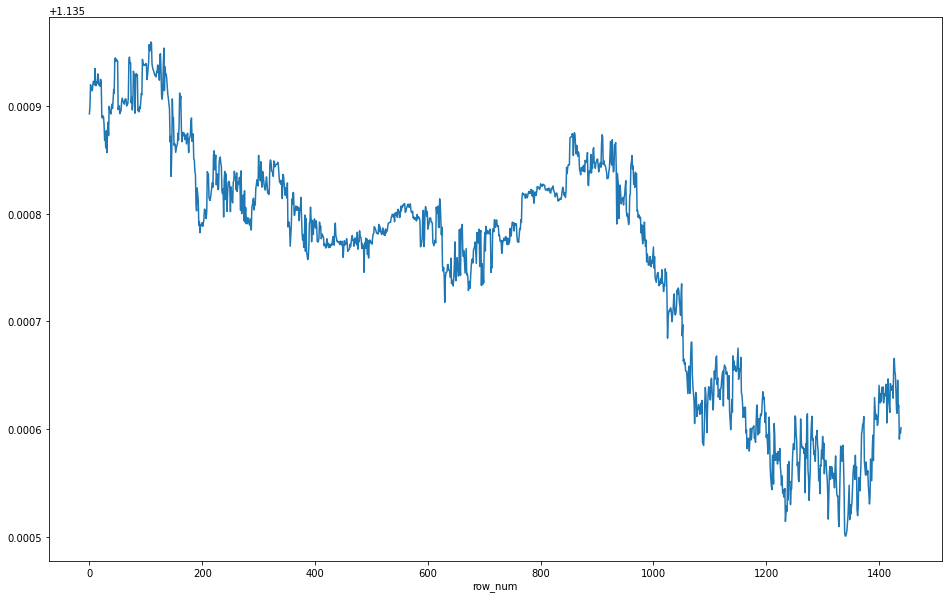

In [24]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 